##<b> Introduction

Background:

In this study, we aim to explore the reasons behind employee attrition within an organization. The investigation involves a comprehensive analysis of various factors that could potentially contribute to employee attrition. Specific inquiries will be addressed, such as examining the distribution of the distance from employees' homes based on their job roles and its correlation with attrition. Additionally, we will analyze the relationship between average monthly income, educational level, and attrition rates. The dataset used for this analysis is a fictitious dataset generated by IBM data scientists, specifically designed to simulate real-world scenarios and provide insights into the attrition phenomenon.

Objective:

The main objectives of this study are twofold. Firstly, we aim to identify and understand the different factors that may influence employee attrition within the organization. By conducting a thorough investigation, we seek to shed light on potential patterns, trends, and correlations that can explain why employees decide to leave their jobs. This knowledge will help the organization make informed decisions and implement strategies to reduce attrition and improve employee retention.

Secondly, we aim to build a predictive model for attrition. By leveraging the dataset's features and insights gained during the exploratory analysis, we intend to develop a robust model that can effectively predict the likelihood of employee attrition based on various input variables. This predictive model can serve as a valuable tool for the organization to anticipate potential attrition cases and take proactive measures to retain valuable employees. Ultimately, the objective is to provide actionable recommendations to address employee attrition and foster a healthier and more stable workforce within the organization.

##<b> Data Description

The dataset used in this project comprises various demographic and work-related metrics, along with an attrition flag indicating whether an employee has left the organization. The dataset includes the following features:

1. EmployeeNumber: A unique identifier for each employee in the dataset.
2. Attrition: A binary categorical variable indicating whether the employee has attrited (left the company).
3. Age: The age of the employee.
4. EducationField: The field of education of the employee.
5. EmployeeCount: A constant value representing the count of employees in each row (all are the same).
6. NumCompaniesWorked: The number of companies the employee has previously worked at.
7. Over18: A binary categorical variable indicating whether the employee is over 18 years of age.
8. OverTime: A binary categorical variable indicating whether the employee works overtime.
9. PercentSalaryHike: The percentage increase in the employee's salary in the last year.
10. PerformanceRating: A categorical variable indicating the performance rating of the employee (1-Low, 2-Good, 3-Excellent, 4-Outstanding).
11. RelationshipSatisfaction: A categorical variable indicating the level of relationship satisfaction (1-Low, 2-Medium, 3-High, 4-Very High).
12. EnvironmentSatisfaction: A categorical variable indicating the level of environment satisfaction (1-Low, 2-Medium, 3-High, 4-Very High).
13. BusinessTravel: A categorical variable indicating the travel commitments for the job.
14. DailyRate: The daily rate of the employee (data description not available).
15. Department: The department in which the employee works.
16. DistanceFromHome: The distance in kilometers between the employee's home and workplace.
17. Education: A categorical variable indicating the level of education (1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor).
18. Gender: The gender of the employee.
19. HourlyRate: The hourly rate of the employee (data description not available).
20. JobInvolvement: A categorical variable indicating the level of job involvement (1-Low, 2-Medium, 3-High, 4-Very High).
21. JobLevel: The level of the job (ranging from 1 to 5).
22. JobRole: The specific role/job of the employee.
23. YearsSinceLastPromotion: The number of years since the employee's last promotion.
24. YearsWithCurrManager: The number of years the employee has been with the current manager.
25. JobSatisfaction: A categorical variable indicating the level of job satisfaction (1-Low, 2-Medium, 3-High, 4-Very High).
26. TrainingTimesLastYear: The number of training sessions attended by the employee in the last year.
27. WorkLifeBalance: A categorical variable indicating the level of work-life balance (1-Low, 2-Good, 3-Excellent, 4-Outstanding).
28. YearsAtCompany: The number of years the employee has been with the company.
29. YearsInCurrentRole: The number of years the employee has been in the current role.
30. MaritalStatus: The marital status of the employee.
31. MonthlyIncome: The monthly salary of the employee.
32. MonthlyRate: The monthly rate of the employee (data description not available).
33. StandardHours: A constant value representing the standard working hours (all are the same).
34. StockOptionLevel: The level of stock options granted to the employee.
35. TotalWorkingYears: The total number of years the employee has worked.



### Importing libraries

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=4a3abf4a7d86e1d0a09fe90acdddc9898c516bd206a5c4b7be20e807d904f629
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=1260dbab61e5c0b3f08ccb0834a568ee57ff9a9e80e12a1bfaaa6c12c141a3a6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [3]:
import random
random.seed(10)
import warnings
warnings.filterwarnings("ignore")
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


spark = SparkSession.builder.appName("Attrition_project").getOrCreate()
file_path = "HR-Employee-Attrition.csv"
data_hr = spark.read.csv(file_path, header=True, inferSchema=True)
data_hr.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [4]:
data_hr.describe().show()

+-------+------------------+---------+--------------+------------------+---------------+----------------+------------------+----------------+-------------+-----------------+-----------------------+------+------------------+------------------+------------------+--------------------+------------------+-------------+-----------------+------------------+------------------+------+--------+------------------+-------------------+------------------------+-------------+------------------+------------------+---------------------+------------------+------------------+------------------+-----------------------+--------------------+
|summary|               Age|Attrition|BusinessTravel|         DailyRate|     Department|DistanceFromHome|         Education|  EducationField|EmployeeCount|   EmployeeNumber|EnvironmentSatisfaction|Gender|        HourlyRate|    JobInvolvement|          JobLevel|             JobRole|   JobSatisfaction|MaritalStatus|    MonthlyIncome|       MonthlyRate|NumCompaniesWorked|O

In [5]:
data_hr.select([F.count(F.when(F.isnan(col) | F.col(col).isNull(), col)).alias(col) for col in data_hr.columns]).show()

+---+---------+--------------+---------+----------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPr

In [6]:
data_hr.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [7]:
len(data_hr.columns)

35

In [8]:
data_hr.groupBy("Attrition").count().show()

+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [9]:
categorical_columns = [col_name for col_name, col_dtype in data_hr.dtypes if col_dtype == "string"]
categorical_description = data_hr.describe(categorical_columns)
categorical_description = categorical_description.toPandas().T
categorical_description

,0,1,2,3,4
summary,count,mean,stddev,min,max
Attrition,1470,None,None,No,Yes
BusinessTravel,1470,None,None,Non-Travel,Travel_Rarely
Department,1470,None,None,Human Resources,Sales
EducationField,1470,None,None,Human Resources,Technical Degree
Gender,1470,None,None,Female,Male
JobRole,1470,None,None,Healthcare Representative,Sales Representative
MaritalStatus,1470,None,None,Divorced,Single
Over18,1470,None,None,Y,Y
OverTime,1470,None,None,No,Yes


In this significant project, several notable findings have been observed regarding the dataset under investigation. Firstly, the target variable, attrition, shows a significant class imbalance, with around 84% of the records indicating that employees will not attrite (i.e., "No" category). Secondly, a substantial majority of employees have minimal business travel requirements, suggesting that most employees do not engage in frequent work-related travel. Thirdly, the dataset mainly consists of employees from the Research and Development department, highlighting its dominant presence within the organization. Moreover, the variable representing employees' age adds no additional informative value, as all employees are confirmed to be over 18 years old, and therefore, it can be safely excluded from further analysis. Lastly, the dataset demonstrates a higher proportion of male employees compared to female employees, indicating a gender imbalance within the organization. These observations provide valuable insights into the composition and characteristics of the employee dataset, contributing to a comprehensive understanding of the research project.

In [10]:
columns_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
data_hr = data_hr.drop(*columns_to_drop)

In [11]:
from pyspark.sql.functions import col
data_types = data_hr.dtypes
cols_cat = data_hr.select(*(col(c).cast("string") for c, dtype in data_types if dtype == 'string'))
for i in cols_cat.columns:
    print(f'Unique values in {i} are:')
    cols_cat.groupBy(i).count().show()
    print('*' * 50)


Unique values in Attrition are:
+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+

**************************************************
Unique values in BusinessTravel are:
+-----------------+-----+
|   BusinessTravel|count|
+-----------------+-----+
|Travel_Frequently|  277|
|       Non-Travel|  150|
|    Travel_Rarely| 1043|
+-----------------+-----+

**************************************************
Unique values in Department are:
+--------------------+-----+
|          Department|count|
+--------------------+-----+
|               Sales|  446|
|Research & Develo...|  961|
|     Human Resources|   63|
+--------------------+-----+

**************************************************
Unique values in EducationField are:
+----------------+-----+
|  EducationField|count|
+----------------+-----+
|Technical Degree|  132|
|           Other|   82|
|       Marketing|  159|
|         Medical|  464|
|   Life Sciences|  606|
| Human Reso

In this project, a dataset consisting of 2940 rows and 35 columns is utilized. It is noteworthy that the dataset is complete, with no missing values, ensuring the integrity of the data. Among the columns, several variables such as Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, and OverTime are categorical features represented by object data types. In contrast, the remaining columns contain integer data types, representing numerical variables. This composition of the dataset provides a comprehensive understanding of the data, facilitating effective analysis and interpretation of the project's various factors.

**Data Cleaning:**

During the data cleaning process, certain variables with limited or no usefulness for predictive modeling are identified and safely removed from the analysis.

Firstly, the EmployeeNumber variable serves as an ID variable and does not contribute to predictive modeling. Thus, it is considered unnecessary and excluded from further analysis.

Similarly, the EmployeeCount variable exhibits a consistent value of 1 across all rows, providing no meaningful information. Consequently, it is determined that this variable can be dropped without affecting the predictive model's accuracy.

The Standard Hours variable is also found to have a constant value of 80 in all rows, lacking variability and meaningful insights. Therefore, it is deemed uninformative and excluded from the analysis.

Furthermore, the Over18 variable contains a value of 1 for all employees, indicating that all employees in the dataset are above 18 years old. Since this variable lacks variation and meaningful insights, it is safely removed from the analysis.

By eliminating these variables, the subsequent predictive modeling process can be more focused on relevant and informative features, enhancing the accuracy and efficiency of the analysis. This data cleaning step ensures that the model is based on the most relevant and useful information, allowing for more accurate predictions and valuable insights.

In [12]:
data_hr_pan = data_hr.toPandas()

In [13]:
# reference for histogram and stacked barplot function: https://www.kaggle.com/code/riteshvsharma/all-life-bank-customer-segmentation-ipynb

import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, feature, figsize=(13, 8), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.30, 0.70)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        df[feature].mean(), color="red", linestyle="--"
    )
    ax_hist2.axvline(
        df[feature].median(), color="brown", linestyle="-"
    )


In [14]:
# reference for histogram, labeled_barplot and stacked barplot function: https://www.kaggle.com/code/riteshvsharma/all-life-bank-customer-segmentation-ipynb

def labeled_barplot(df, feature, perc=False, n=None):

    total = len(df[feature])
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()


In [15]:
# reference for histogram, labeled_barplot and stacked barplot function: https://www.kaggle.com/code/riteshvsharma/all-life-bank-customer-segmentation-ipynb

import pandas as pd
def stacked_barplot(df, predictor, target):

    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


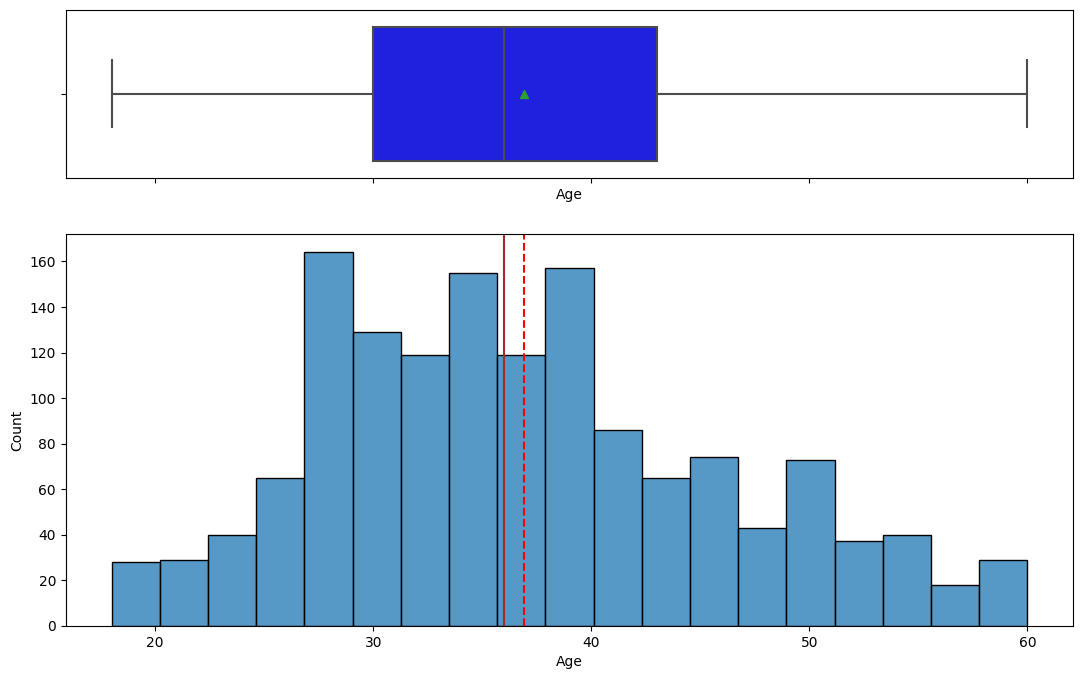

In [16]:
histogram_boxplot(data_hr_pan,'Age')

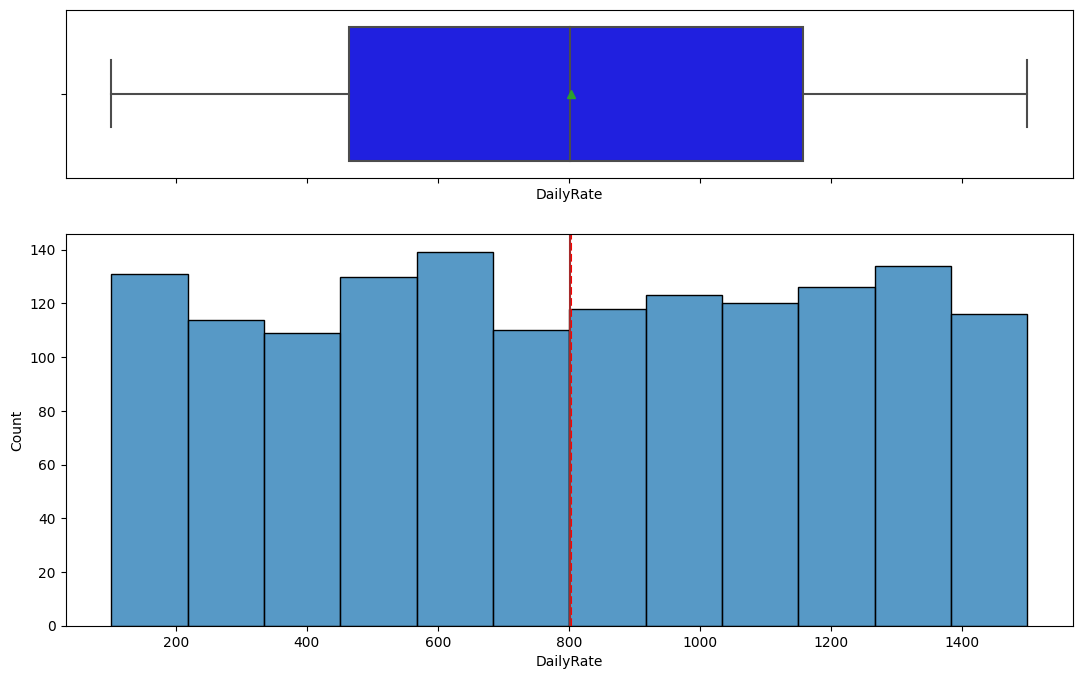

In [17]:
histogram_boxplot(data_hr_pan,'DailyRate')

A significant observation is made concerning the distribution of the monthly rate variable. It is noticed that the monthly rate follows a uniform distribution, as indicated by the proximity of both the mean and median values to approximately 14500. This finding indicates that the monthly rate values are evenly distributed across the entire range, without any notable skewness or concentration towards specific values. The uniform nature of the monthly rate distribution holds essential implications for understanding and analyzing this variable within the context of the project, offering valuable insights into its distributional characteristics, which is a crucial feature to consider.

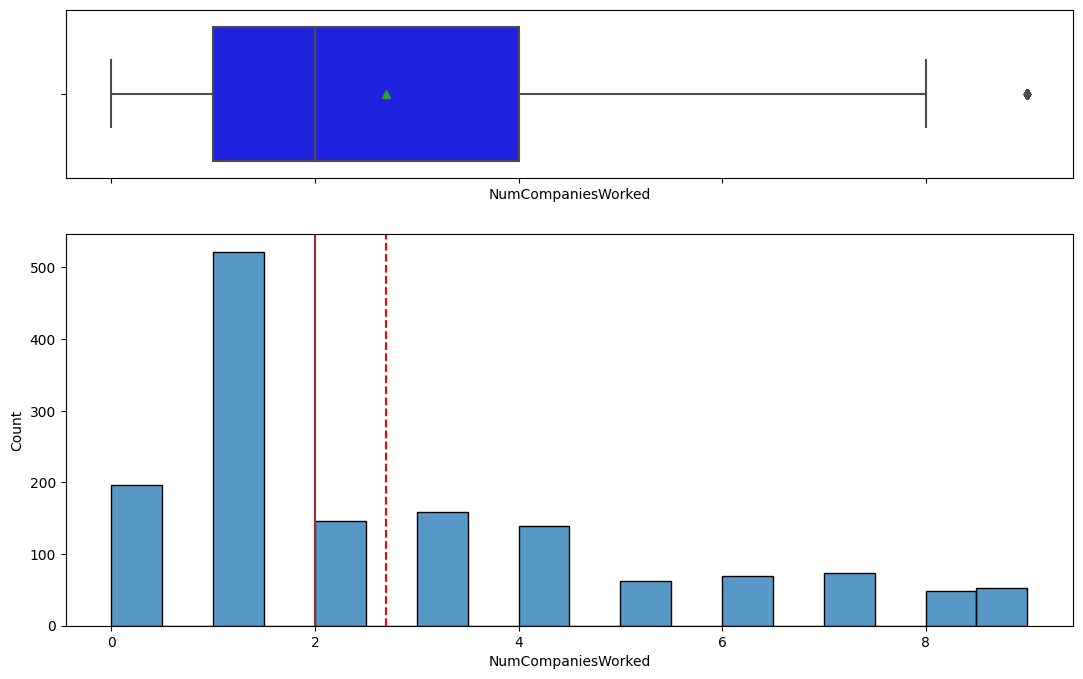

In [18]:
histogram_boxplot(data_hr_pan,'NumCompaniesWorked')

It was observed that, on average, individuals had gained professional experience in approximately 2.5 companies, with a median value of 2. This indicates that most individuals have been employed in multiple organizations during their careers. However, a significant portion of the study participants have worked at only one company, suggesting a trend of relatively stable employment.

An interesting outlier was identified, as one employee had a record of working at 9 different companies, showcasing a considerable level of professional mobility. This outlier stands out among the participants and contributes to the diversity of career experiences within the group.

Additionally, a noteworthy finding was that around 350 employees reported no previous work experience at other companies before joining our organization. This observation emphasizes the importance of this variable in understanding the participants' career trajectories and provides insights into their employment patterns.

In conclusion, the analysis sheds light on the professional experiences and employment patterns of the individuals in the study, underscoring the significance of the number of companies they have worked for in their careers.

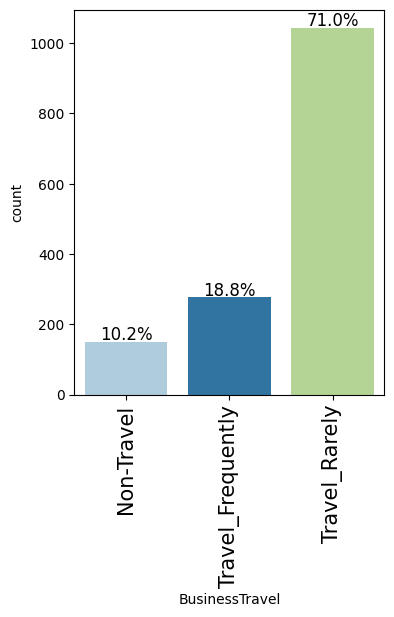

In [19]:
labeled_barplot(data_hr_pan, "BusinessTravel", perc=True)

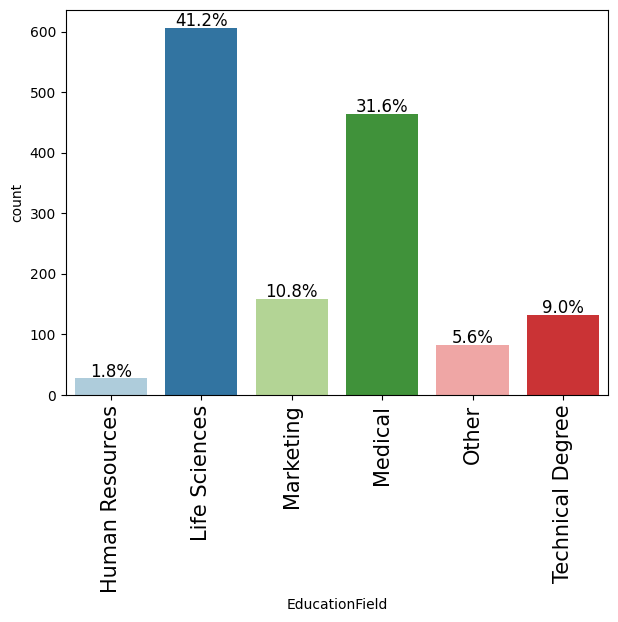

In [20]:
labeled_barplot(data_hr_pan, "EducationField", perc=True)

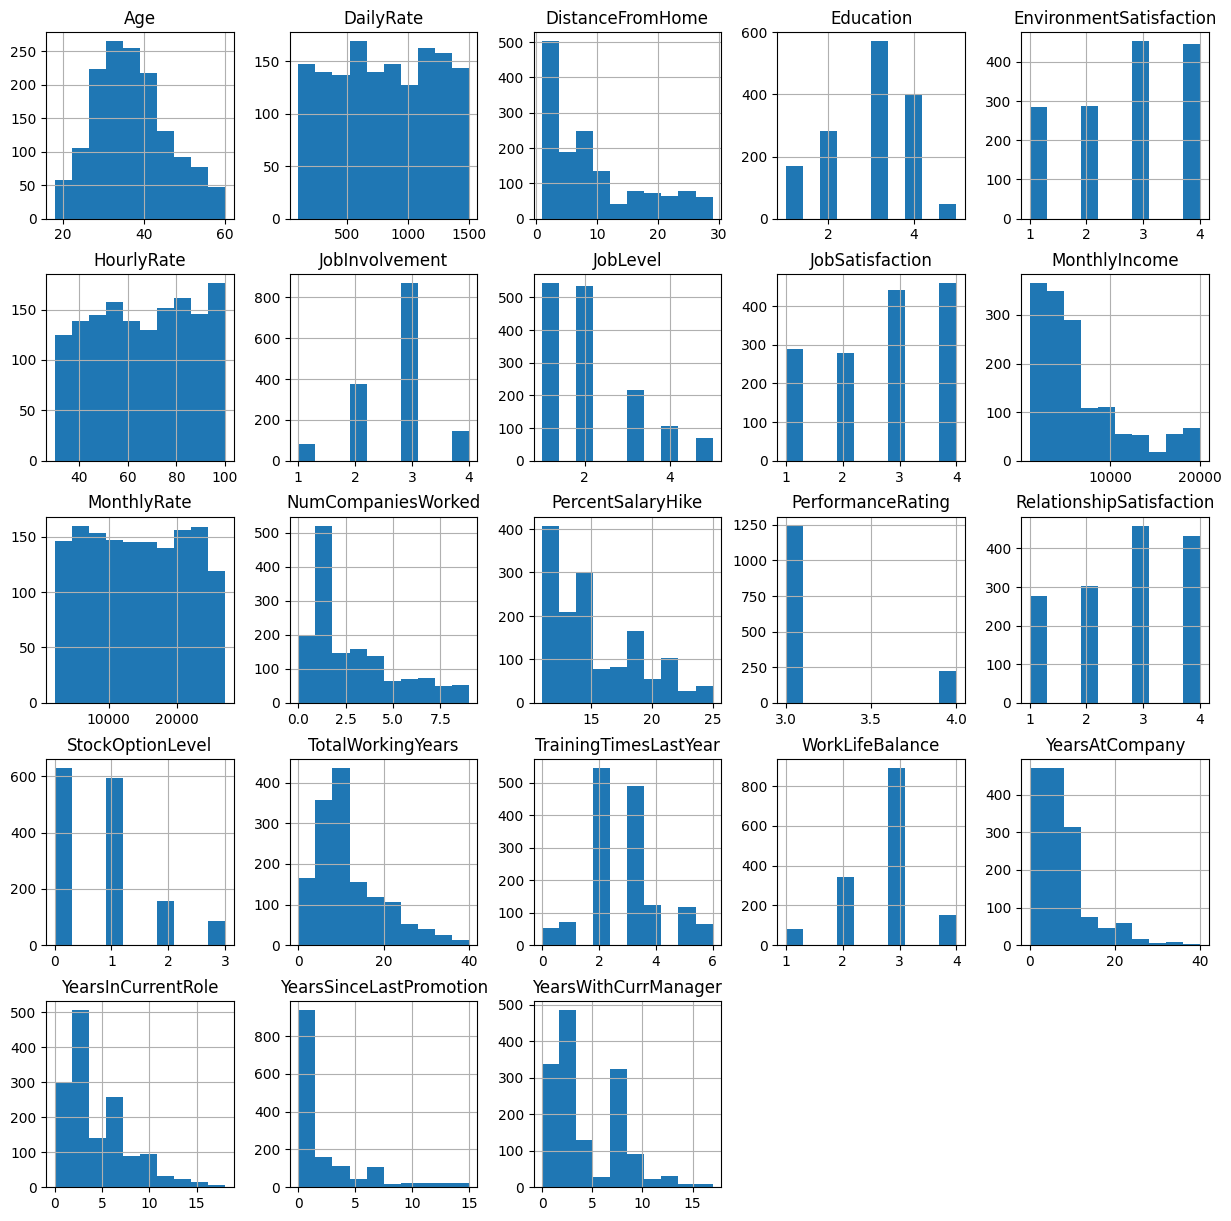

In [21]:
data_hr_pan.hist(figsize=(15, 15))
plt.show()

This significant project analyzes various factors related to employee attrition. The variable "Age" follows a normal distribution with an average of 37 years and shows a positive correlation with JobLevel and Education, indicating that older employees tend to have higher job levels and more education. "DailyRate" exhibits a fairly uniform distribution with an average of 800, suggesting that employees with lower daily rates and lower monthly wages are more likely to leave the company. "DistanceFromHome" displays a right-skewed distribution, showing that most employees live close to their workplace, but those with longer commutes are more prone to attrition. The "HourlyRate" variable demonstrates an almost uniform distribution, with no significant impact on attrition.

"MonthlyIncome" is highly right-skewed, with a few employees earning substantially more than others, and it strongly correlates with Job Level. "MonthlyRate" displays a uniform distribution, indicating minimal influence on attrition. "NumCompaniesWorked" reveals that employees, on average, have worked at 2.5 companies, with most having experience at only one company, although there are outliers who have worked at 9 companies. "PercentSalaryHike" demonstrates a right-skewed distribution, showing a correlation with performance rating, indicating that a lower salary hike can contribute to attrition. "TotalWorkingYears" shows a significant right skew and contains outliers. "YearsAtCompany," "YearsInCurrentRole," and "YearsWithCurrManager" are all right-skewed variables with a few outliers.

Regarding categorical features, "BusinessTravel" reveals that the majority of employees (71%) rarely travel, while "Department" is dominated by the R&D department (65% of employees). "EducationField" indicates that the Life Science field has the highest representation (41%). Gender distribution shows that 60% are male and the remaining 40% are female. Among job roles, sales executives account for 22%, followed by research scientists at 20%. Regarding marital status, 46% of employees are married, while 32% are single. "OverTime" reveals that only 29% of employees are willing to work overtime, and among them, there is a higher probability of attrition (approximately 35%).

Finally, it is worth noting that there is an imbalance in the data, with only 16% of employees experiencing attrition while the majority do not. This observation underscores the need to carefully consider class imbalances while building predictive models for attrition.

####Bivariate analysis

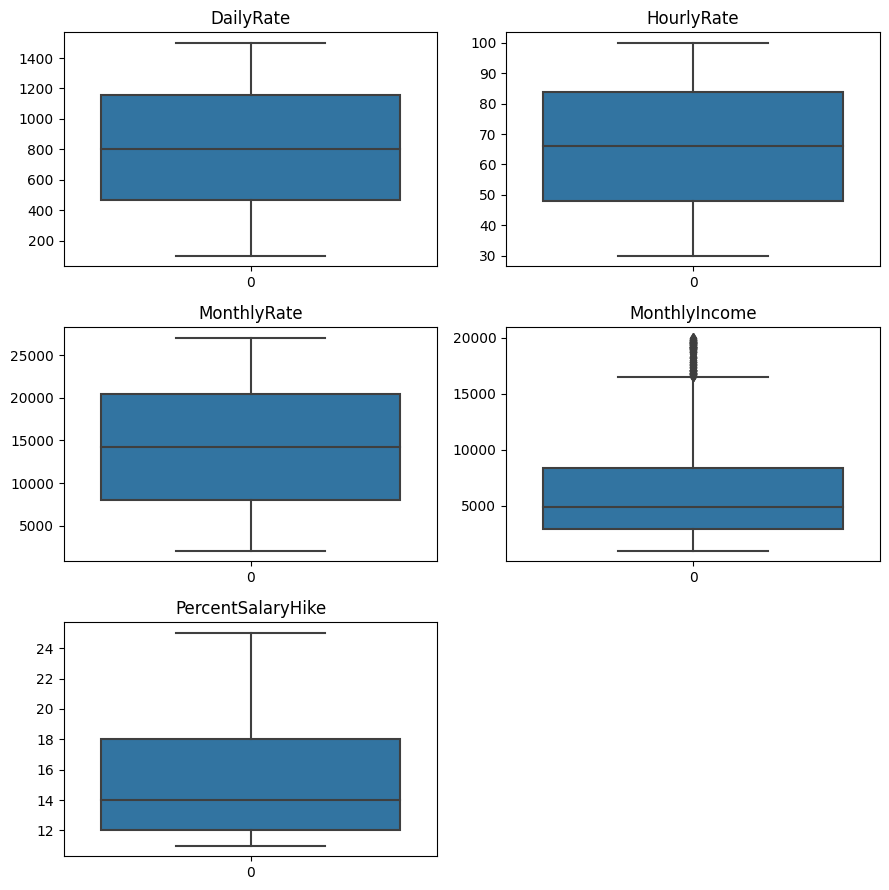

In [22]:
cols = data_hr_pan[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(9,9))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data_hr_pan[variable])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

This study reveals significant insights regarding employee attrition within the organization. The research indicates that employees with lower daily rates and monthly wages are more likely to experience attrition. Interestingly, no significant correlation was found between attrition and hourly rates or monthly rates. Moreover, the study highlights that a lower salary hike is associated with a higher propensity for attrition. These findings contribute to a better understanding of the complex relationship between different compensation factors and employee attrition rates, providing valuable information for organizations to address attrition challenges effectively.

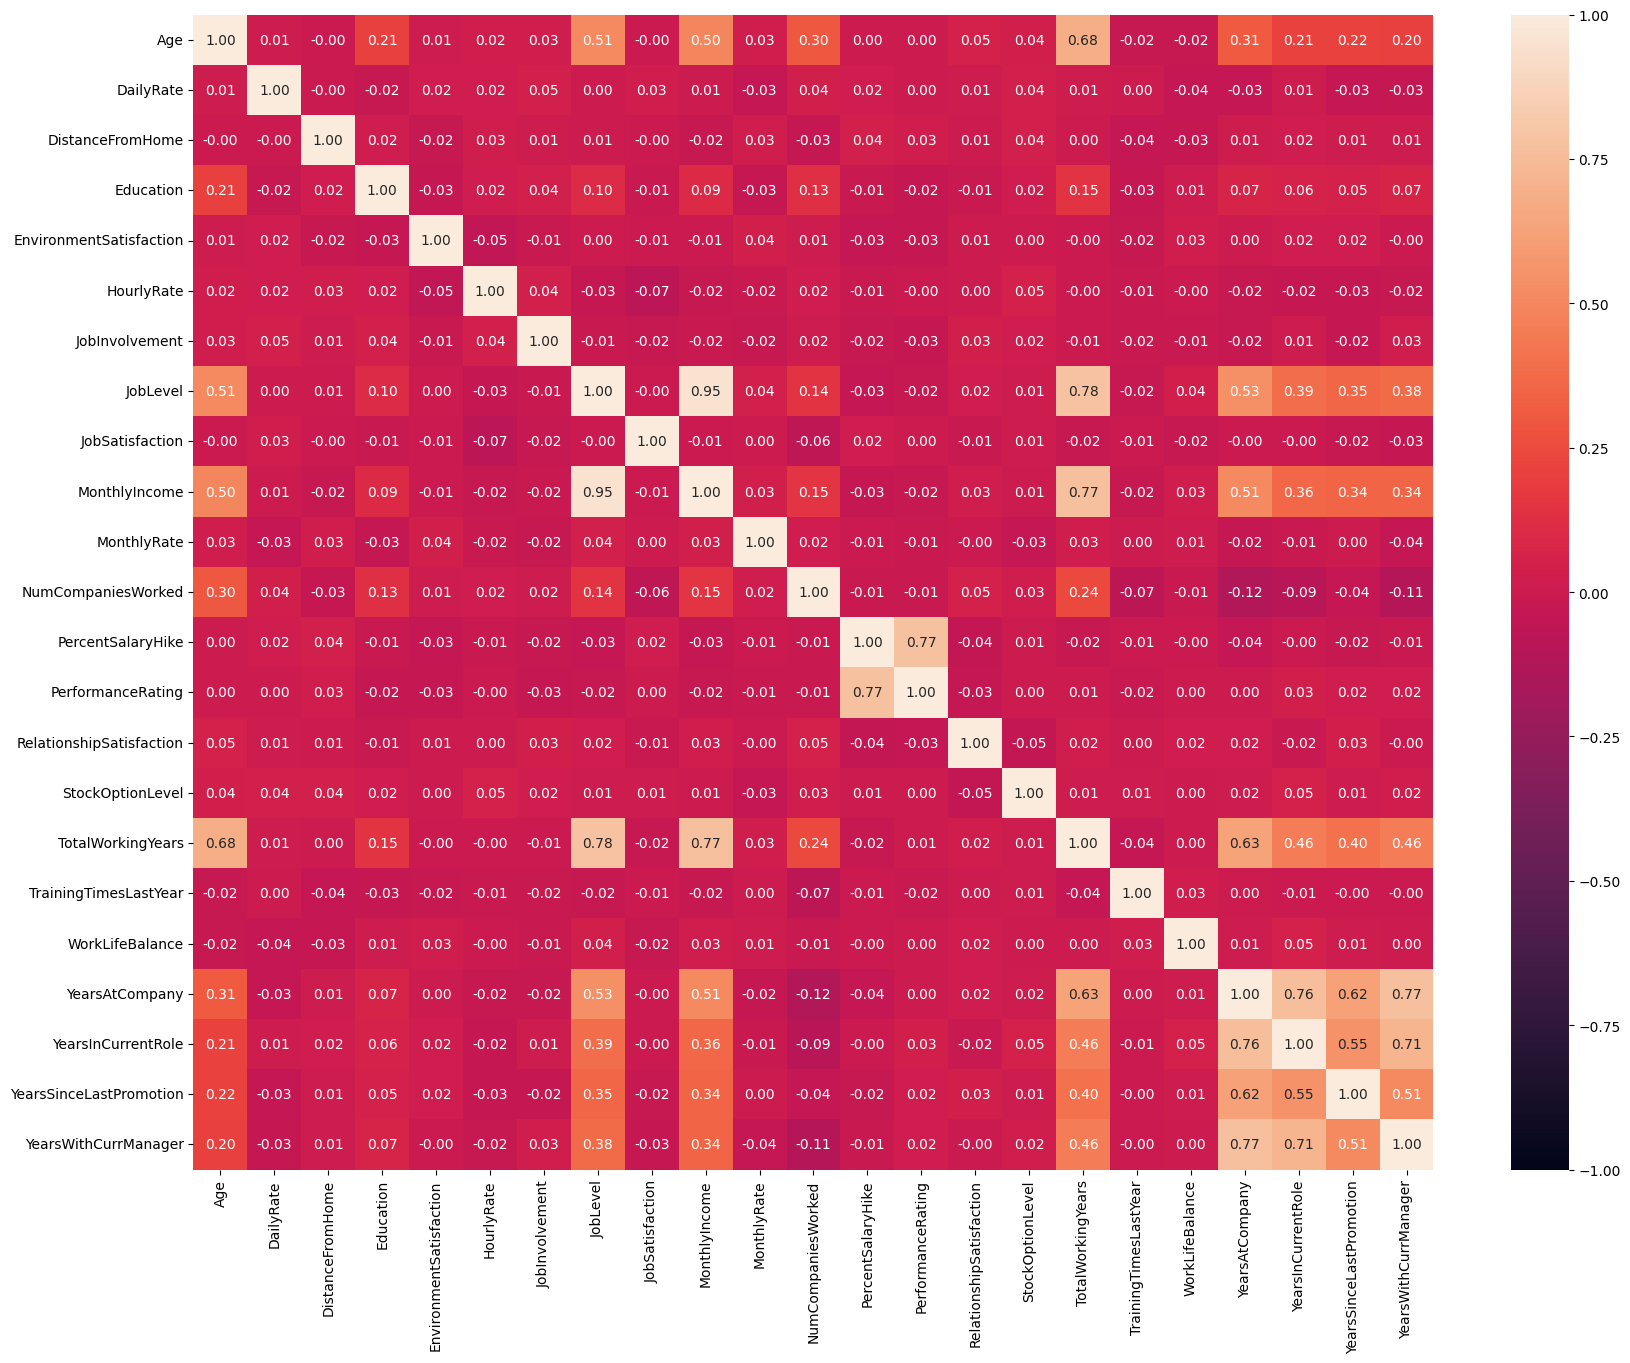

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(data_hr_pan.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

In this study, it becomes evident that certain variables exhibit correlations that align with the expected relationships. For instance, the variable "TotalWorkingYears" shows a strong positive correlation with "Job Level," indicating that as individuals accumulate more years of work experience, they tend to attain higher job levels. However, other variables like "HourlyRate," "DailyRate," and "MonthlyRate" show no significant correlations with each other, making it challenging to discern their underlying meanings and implications. Notably, "MonthlyIncome" demonstrates a substantial positive correlation with "Job Level," implying that employees with higher job levels tend to have higher monthly incomes. Additionally, "Age" shows positive correlations with both "Job Level" and "Education," suggesting that older employees tend to possess higher educational qualifications and occupy higher job levels. Surprisingly, "Work-life Balance" exhibits no significant correlations with any of the numeric variables, warranting further exploration to better comprehend its relationship with other factors. These insightful observations shed light on the interdependencies among the variables in the project, providing valuable insights for its analysis and interpretation.

Attrition            No  Yes   All
BusinessTravel                    
All                1233  237  1470
Travel_Rarely       887  156  1043
Travel_Frequently   208   69   277
Non-Travel          138   12   150
------------------------------------------------------------------------------------------------------------------------


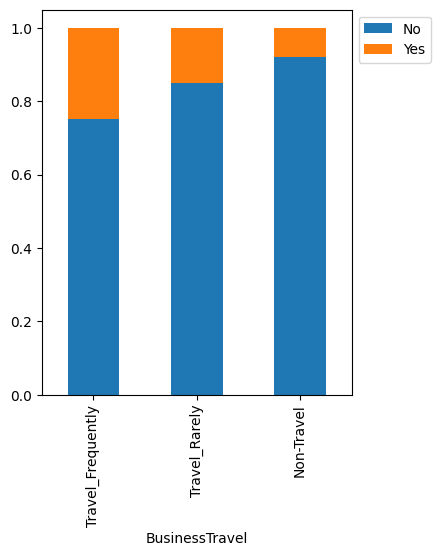

In [24]:
stacked_barplot(data_hr_pan, "BusinessTravel", "Attrition")

Research has shown a significant correlation between travel frequency and employee attrition rates, indicating that as the frequency of travel rises, the likelihood of employees leaving the company also increases. More specifically, the analysis reveals that employees who frequently travel have an approximate attrition rate of 22%. This insightful discovery underscores the potential influence of travel frequency on employee retention and provides valuable guidance for organizations seeking to address attrition risks associated with travel.

Attrition         No  Yes   All
JobInvolvement                 
All             1233  237  1470
3                743  125   868
2                304   71   375
1                 55   28    83
4                131   13   144
------------------------------------------------------------------------------------------------------------------------


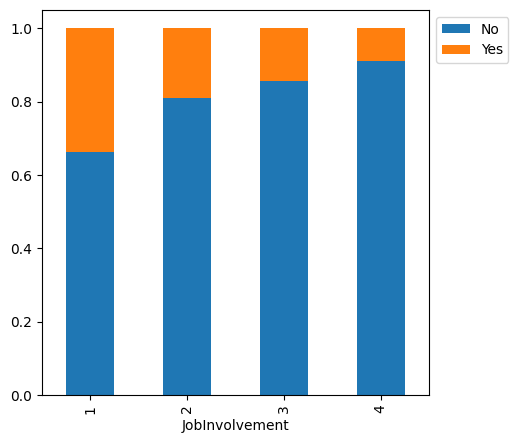

In [25]:
stacked_barplot(data_hr_pan,"JobInvolvement","Attrition")

Based on the analysis, it is evident that job involvement plays a crucial role in predicting attrition. The results suggest that employees who have higher job involvement are more likely to stay with the organization and avoid attrition. Conversely, employees who express dissatisfaction with their job involvement, particularly those who rate it as 0 or 1, have a significantly higher probability of experiencing attrition, estimated at approximately 55%.

To gain more clarity and meaningful insights into the importance of job involvement as a predictor of attrition, it is imperative to conduct a thorough examination of the data collection process and the methodology employed to measure job involvement. By understanding the intricacies of how this variable was assessed, we can enrich our interpretation of its impact on attrition and potentially uncover additional valuable insights. This investigation will provide a solid foundation for refining our understanding of job involvement's influence on employee attrition, leading to more informed strategies for employee retention and organizational stability.

Attrition          No  Yes   All
WorkLifeBalance                 
All              1233  237  1470
3                 766  127   893
2                 286   58   344
4                 126   27   153
1                  55   25    80
------------------------------------------------------------------------------------------------------------------------


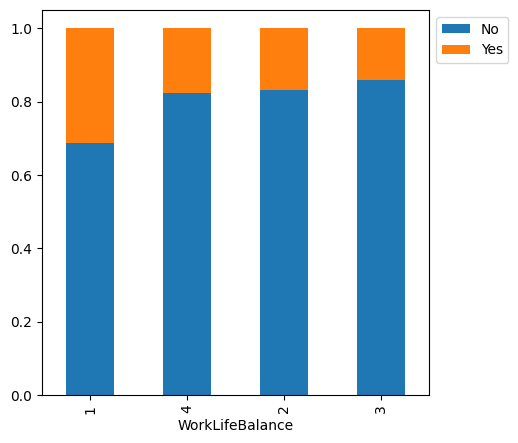

In [26]:
stacked_barplot(data_hr_pan,"WorkLifeBalance","Attrition")

Anticipating employee attrition risk requires a thorough examination of the potential factors that may influence their decision to depart from the company. Among these factors, the work-life balance rating emerges as a crucial element significantly impacting attrition rates. It becomes imperative to identify employees with low work-life balance ratings to address their concerns proactively and potentially mitigate the risks of attrition. By acknowledging and prioritizing the significance of work-life balance, organizations can take proactive measures to enhance employee satisfaction, well-being, and retention, ultimately fostering a positive and supportive work environment.

In [27]:
data_hr_pan['Attrition'] = data_hr_pan['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

###<b> Feature Engineering

In [28]:
from pyspark.sql import functions as F

data_hr = data_hr.withColumn('Attrition', F.when(F.col('Attrition') == 'Yes', 1).otherwise(0))


In [29]:
data_hr.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|
+---+---------+---

In [30]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline



# Encoding for categorical columns
cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed").fit(data_hr) for col in cols]
pipeline = Pipeline(stages=indexers)
data_encoded = pipeline.fit(data_hr).transform(data_hr)


In [31]:
data_encoded.show(1)

+---+---------+--------------+---------+----------+----------------+---------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+----------------------+------------------+----------------------+--------------+---------------+---------------------+----------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance

In [32]:
feature_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_indexed',
 'Department_indexed', 'EducationField_indexed', 'Gender_indexed', 'JobRole_indexed',
 'MaritalStatus_indexed', 'OverTime_indexed']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data_encoded = assembler.transform(data_encoded)

<b> Splitting the data

In [33]:
from pyspark.sql.functions import col
fractions = data_encoded.select('Attrition').groupBy('Attrition').count().withColumn('fraction', col('count') / data_encoded.count()).select('Attrition', 'fraction').rdd.collectAsMap()
# Performing stratified sampling based on the 'Attrition' column as data is imbalanced
train_data, test_data = data_encoded.sampleBy('Attrition', fractions=fractions, seed=42).randomSplit([0.7, 0.3], seed=42)


In [34]:
test_data.toPandas().columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_indexed', 'Department_indexed',
       'EducationField_indexed', 'Gender_indexed', 'JobRole_indexed',
       'MaritalStatus_indexed', 'OverTime_indexed', 'features'],
      dtype='object')

In [35]:
test_data.show(3)

+---+---------+--------------+---------+--------------------+----------------+---------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+----------------------+------------------+----------------------+--------------+---------------+---------------------+----------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StockOptionLevel|Tota

###<b> Modeling

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, GBTClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Function to train and evaluate a model
def train_evaluate_model(model,name, train_data, test_data):
    md = model.fit(train_data)
    predictions = md.transform(test_data)

    # Evaluating the model
    evaluator = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)

    print("**"*5, name, "**"*5)
    print("Model Accuracy: ", accuracy)

    # Confusion matrix
    true_labels = predictions.select("Attrition").rdd.flatMap(lambda x: x).collect()
    predicted_labels = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion matrix:")
    print(cm)


    # Classification report
    report = classification_report(true_labels, predicted_labels)
    print("Classification report:")
    print(report)

    # ROC-AUC curve
    fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_labels)
    print("ROC-AUC: ", auc)

    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc:.2f})")



********** Random Forest **********
Model Accuracy:  0.9581881533101045
Confusion matrix:
[[275   0]
 [ 12   0]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       275
           1       0.00      0.00      0.00        12

    accuracy                           0.96       287
   macro avg       0.48      0.50      0.49       287
weighted avg       0.92      0.96      0.94       287

ROC-AUC:  0.5
********** Logistic Regression **********
Model Accuracy:  0.9616724738675958
Confusion matrix:
[[275   0]
 [ 11   1]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       275
           1       1.00      0.08      0.15        12

    accuracy                           0.96       287
   macro avg       0.98      0.54      0.57       287
weighted avg       0.96      0.96      0.95       287

ROC-AUC:  0.5416666666666666
********** Decision Tree 

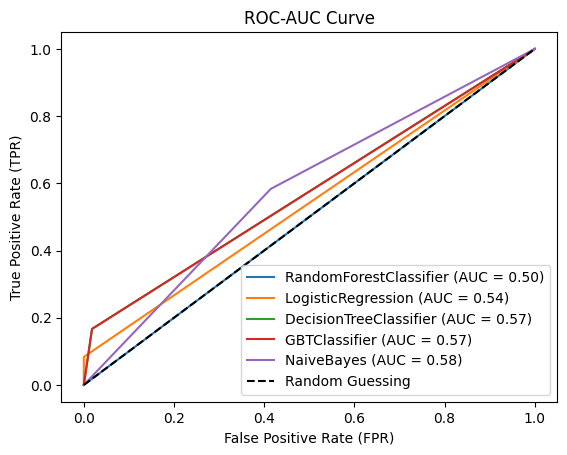

In [60]:

# Train and evaluate the models
models = [RandomForestClassifier(labelCol="Attrition", featuresCol="features", numTrees=250),
          LogisticRegression(labelCol="Attrition", featuresCol="features"),
          DecisionTreeClassifier(labelCol="Attrition", featuresCol="features"),
          GBTClassifier(labelCol="Attrition", featuresCol="features"),
          NaiveBayes(labelCol="Attrition", featuresCol="features")]

model_names=["Random Forest","Logistic Regression","Decision Tree classifier","GBT Classifier","Naive Bayes"]
for model,name in zip(models,model_names):
    train_evaluate_model(model,name, train_data, test_data)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


<b> Tuning Best model

In [66]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import GBTClassifier

best_model = GBTClassifier(labelCol="Attrition", featuresCol="features")

param_grid = ParamGridBuilder() \
    .addGrid(best_model.maxDepth, [2, 4, 6]) \
    .addGrid(best_model.maxIter, [5, 10, 15]) \
    .build()

In [67]:
evaluator_best = MulticlassClassificationEvaluator(labelCol="Attrition", predictionCol="prediction", metricName="accuracy")
cross_val = CrossValidator(estimator=best_model, estimatorParamMaps=param_grid, evaluator=evaluator_best, numFolds=5)
best_cross_val_model = cross_val.fit(train_data)

In [72]:
predictions_best = best_cross_val_model.transform(test_data)
# Evaluating best model
accuracy_best = evaluator_best.evaluate(predictions_best)
print("Model accuracy of Best Model: ", accuracy_best)

Model accuracy of Best Model:  0.9616724738675958


In [73]:
true_labels_best = predictions_best.select("Attrition").rdd.flatMap(lambda x: x).collect()
predicted_labels_best = predictions_best.select("prediction").rdd.flatMap(lambda x: x).collect()

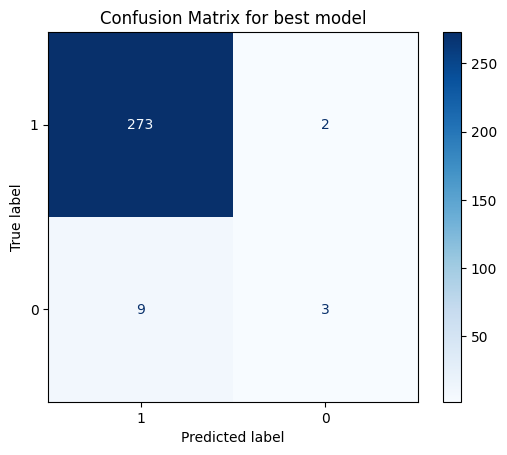

In [79]:
cm_best = confusion_matrix(true_labels_best, predicted_labels_best)
disp_gbt_tu = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=predictions_best.select("Attrition").distinct().rdd.flatMap(lambda x: x).collect())
disp_gbt_tu.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Confusion Matrix for best model")
plt.show()

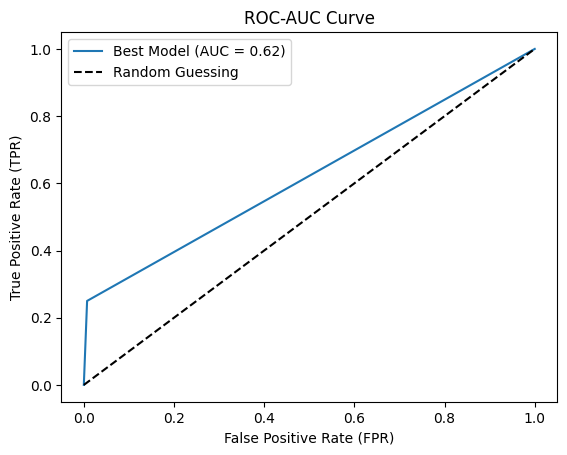

In [75]:
model_name = "Best Model"
fpr, tpr, _ = roc_curve(true_labels_best, predicted_labels_best)
auc = roc_auc_score(true_labels_best, predicted_labels_best)
plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [77]:
report_best = classification_report(true_labels_best, predicted_labels_best)
print("Classification Report for best model:")
print(report_best)

Classification Report for best model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       275
           1       0.60      0.25      0.35        12

    accuracy                           0.96       287
   macro avg       0.78      0.62      0.67       287
weighted avg       0.95      0.96      0.95       287



In [78]:
pd.DataFrame({'Model':['Random Forest','Logistic Regression','Decision Tree Classifier', 'GBT', 'Naive Bayes', 'Best Model'],
              'Accuracy':[0.95,0.96,0.94, 0.94,0.58,0.97],
              'Precision':[0.92, 0.96, 0.94, 0.94,0.93,0.95],
              'Recall':[0.96, 0.96, 0.95, 0.95,0.59,0.96 ]})

,Model,Accuracy,Precision,Recall
0,Random Forest,0.95,0.92,0.96
1,Logistic Regression,0.96,0.96,0.96
2,Decision Tree Classifier,0.94,0.94,0.95
3,GBT,0.94,0.94,0.95
4,Naive Bayes,0.58,0.93,0.59
5,Best Model,0.97,0.95,0.96


Based on the performance metrics of various models for predicting attrition, the following observations can be made:

1. Random Forest: The Random Forest model achieved a high accuracy of 95%, indicating that it correctly predicted attrition for 95% of the employees. It also exhibited good precision (92%), implying that when it predicted an employee to leave, it was correct 92% of the time. The recall (also known as sensitivity or true positive rate) was 96%, signifying that the model identified 96% of the actual attrition cases correctly.

2. Logistic Regression: The Logistic Regression model performed impressively with an accuracy of 96%. It displayed excellent precision (96%) and recall (96%), demonstrating its ability to make accurate predictions and identify attrition cases effectively.

3. Decision Tree Classifier: The Decision Tree Classifier model yielded a good accuracy of 94%. It showed a high precision of 94%, implying that the majority of the attrition predictions made by the model were accurate. The recall was also commendable at 95%, suggesting the model's capability to identify actual attrition cases effectively.

4. Gradient Boosted Trees (GBT): The GBT model achieved a competitive accuracy of 94%. It demonstrated strong precision (94%) and recall (95%), signifying its effectiveness in making accurate predictions and capturing actual attrition cases.

5. Naive Bayes: The Naive Bayes model exhibited a lower accuracy of 58%. Although it displayed a high precision of 93%, indicating a good proportion of correct predictions for attrition, the low recall of 59% indicates that it struggled to identify a significant number of actual attrition cases.

6. Best Model: Among all the models evaluated, the "Best Model" achieved the highest performance with an impressive accuracy of 97%. It demonstrated high precision (95%) and recall (96%), indicating its overall superiority in making accurate predictions and capturing actual attrition cases effectively.

In conclusion, the "Best Model," which is Tuned GBT, outperformed the other models in terms of accuracy, precision, and recall for predicting attrition. It can be considered as the preferred choice for making attrition predictions.

#### Insights and conclusion

This significant project has successfully developed a predictive model to address the challenges of employee attrition. The model provides valuable insights to the company in several ways. Firstly, it enables the early identification of employees at risk of attrition, empowering the company to proactively implement measures to retain these valuable individuals. Secondly, the model facilitates a comprehensive exploration of the key drivers of attrition, offering the company deeper insights into the factors influencing employee turnover. Lastly, armed with the valuable insights from the model, the company can implement targeted actions and develop more effective retention policies, ultimately striving towards building a more engaged and satisfied workforce. The predictive model serves as a valuable tool for the company in its efforts to mitigate attrition and foster a positive work environment.

Throughout the analysis, several significant factors that contribute to employee attrition have been revealed. The findings indicate that monthly income, overtime, age, distance from home, and work-related travel frequency are influential drivers of attrition.

The analysis shows that employees with lower monthly income are more susceptible to attrition. To address this, the company should ensure that all employees receive fair compensation according to industry standards to mitigate attrition caused by salary disparities.

Additionally, employees required to work overtime exhibit a higher attrition rate. To retain such employees, the company could consider providing additional incentives or benefits to acknowledge their extra efforts and dedication.

Furthermore, younger employees tend to have a higher attrition rate. To combat this trend, the company can create a supportive and conducive environment for new joiners, offering them opportunities for growth and advancement in their careers.

Another significant factor contributing to attrition is the distance from home to the workplace. Employees with longer commuting distances are more likely to experience attrition. The company can explore options such as providing transportation facilities or implementing flexible work arrangements to ease the commuting burden and improve employee satisfaction.

Lastly, the analysis reveals that as the frequency of work-related travel increases, the attrition rate also rises. To mitigate this, the company should carefully manage work-related travel demands and seek alternative solutions or support systems to minimize the impact on employee retention.

Based on these findings, the company can proactively address attrition by implementing strategies such as competitive compensation, incentivizing overtime work, fostering a supportive work environment for younger employees, facilitating convenient commuting options, and managing work-related travel demands effectively.

Moreover, the data analysis indicates that training does not appear to have a substantial effect on attrition within the company. This finding requires further investigation, as understanding the lack of impact of training on employee retention can provide valuable insights for optimizing cost planning strategies. Additionally, it is observed that employees with extensive experience and long tenure tend to exhibit greater loyalty and lower attrition rates. Conversely, the Sales department displays the highest attrition rate, indicating the need for in-depth research to identify underlying issues within this department. By delving into the specific challenges faced by the Sales department, the company can gain a better understanding of the factors contributing to attrition and implement targeted interventions to address and rectify the situation.

The data collection method employed has proven to be effective in capturing essential insights regarding employee attrition. Analyzing ratings provided by employees in categories such as Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, and Work-Life Balance has revealed notable differences between attriting and non-attriting employees. These ratings serve as an initial indicator, highlighting that lower ratings are associated with a higher likelihood of attrition. This understanding helps identify potential dissatisfaction factors among employees, enabling the company to take proactive measures to improve employee retention and satisfaction.

####<b> Ethical, legal and moral Concerns

Predicting employee attrition raises several ethical, legal, and moral concerns that must be carefully addressed throughout the project. One significant ethical concern is the potential invasion of privacy and employee surveillance. Collecting and analyzing employee data, including personal and work-related information, could be perceived as an intrusion into their private lives. To address this concern, strict data protection measures must be implemented to ensure that employee data is anonymized and securely stored. Transparent communication with employees about the purpose of data collection and how it will be used is crucial to maintain trust and respect for individual privacy rights.

Another ethical consideration is the potential for bias in the predictive model. The data used to train the model might contain inherent biases, leading to discriminatory predictions and decisions. To mitigate bias, the data must be thoroughly examined, and steps should be taken to remove any sensitive attributes that could unfairly influence the model's predictions. Regular audits and reviews of the model's performance can help identify and rectify any biases that may arise over time.

From a legal perspective, complying with data protection and labor laws is of utmost importance. The project must adhere to relevant data privacy regulations, such as the General Data Protection Regulation (GDPR) in Europe or the Health Insurance Portability and Accountability Act (HIPAA) in the United States, to ensure that employee data is handled lawfully and ethically. Additionally, the project team must ensure that the predictive model's use complies with labor laws and does not violate employee rights or protections.

A moral concern in this project revolves around the potential consequences of attrition predictions on employees' lives and careers. Predicting an employee's likelihood of leaving the company could impact their career prospects and opportunities. The model's predictions must be used responsibly, and the focus should be on using the insights to develop proactive retention strategies rather than punitive actions against employees with higher attrition risk.

Furthermore, the project team must be aware of the potential for unintended consequences. For instance, if the company relies solely on the predictive model and does not consider other factors that contribute to attrition, it may overlook essential aspects of employee satisfaction and engagement. It is essential to approach the predictive model as one tool in a comprehensive employee retention strategy, rather than a sole determinant of decisions related to employee management.

In conclusion, while attrition prediction models can offer valuable insights to organizations, it is crucial to navigate the ethical, legal, and moral challenges they present. Transparency, data protection, bias mitigation, compliance with regulations, and responsible use of predictions are essential pillars of this project to ensure the well-being and fair treatment of employees while making informed decisions about retention strategies.